# Log Parser Notebook
Exploratory notebook for testing out parsing the logs for workflow statistics


In [9]:
import logging
import datetime
import time

# TODO: better logs: https://www.toptal.com/python/in-depth-python-logging
def configure_logging(save_path='', log_filename='logfile', log_level=logging.INFO):
    """Log to the terminal and to file simultaneously."""
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime(
        '%Y%m%d.%H%M%S')  # datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")
    logging.basicConfig(
        format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s", #"%(asctime)s %(levelname)s %(message)s",
        level=log_level,
        # Multiple handlers can be added to your logging configuration.
        # By default log messages are appended to the file if it exists already
        handlers=[
            logging.FileHandler(save_path+'/'+log_filename+timestamp+'.log'),
            logging.StreamHandler(),
        ])
    return save_path+'/'+log_filename+timestamp+'.log'


import os
log_path = configure_logging(os.path.join(os.getcwd(), "log/run/123456.789"))

### Fake Log Generator

In [137]:
import random

supported_feature_types = ["image_centre", "lamella_centre", "needle_tip", "lamella_edge", "landing_post"]
for i in range(10):


    RANDOM_NUM = random.randint(0, 5)

    if RANDOM_NUM > 4:
        feature_type = random.choice(supported_feature_types)
        response = random.choice([True, False])
        logging.info(f"ml_detection: {feature_type}: {response}")
    elif RANDOM_NUM > 3:
        diff = random.randint(-120, 120)
        gam = random.random() * 2.0
        logging.info(f"gamma_correction: diff: {diff:.3f}: gam: {gam:.3f} ")
    
    else:
        logging.info(f"random other log message not with the same structure {random.random():.2f}")


2021-10-26 16:46:27,318 — root — INFO — <module>:12 — ml_detection: lamella_centre: False
2021-10-26 16:46:27,320 — root — INFO — <module>:19 — random other log message not with the same structure 0.66
2021-10-26 16:46:27,320 — root — INFO — <module>:16 — gamma_correction: diff: 88.000: gam: 0.997 
2021-10-26 16:46:27,321 — root — INFO — <module>:16 — gamma_correction: diff: 79.000: gam: 1.037 
2021-10-26 16:46:27,322 — root — INFO — <module>:16 — gamma_correction: diff: 81.000: gam: 0.845 
2021-10-26 16:46:27,323 — root — INFO — <module>:16 — gamma_correction: diff: 33.000: gam: 0.072 
2021-10-26 16:46:27,323 — root — INFO — <module>:19 — random other log message not with the same structure 0.01
2021-10-26 16:46:27,324 — root — INFO — <module>:19 — random other log message not with the same structure 0.97
2021-10-26 16:46:27,325 — root — INFO — <module>:19 — random other log message not with the same structure 0.94
2021-10-26 16:46:27,326 — root — INFO — <module>:19 — random other log

## Log Parser

In [138]:
score_dict = dict.fromkeys(supported_feature_types, {})

for feature_type in score_dict.keys():
    score_dict[feature_type] = {"True": 0, "False": 0}

gamma_dict = {"gamma": [], "diff": []}


# add a better logging identifier rather than doing this wierd parsing...

with open(log_path) as f:
    lines = f.read().splitlines()
    for i, line in enumerate(lines):
        msg = line.split("—")[-1].strip()  # should just be the message # TODO: need to check the delimeter character...
        res = msg.split(":")[0].strip()
        
        if res == "ml_detection":
            key = msg.split(":")[1].strip()
            val = msg.split(":")[-1].strip()

            if key in score_dict.keys():
                score_dict[key][val] +=1
        if res == "gamma_correction":
            gamma_dict["diff"].append(float(msg.split(":")[2].strip()))
            gamma_dict["gamma"].append(float(msg.split(":")[4].strip()))

from pprint import pprint
pprint(score_dict)
pprint(gamma_dict)


{'image_centre': {'False': 0, 'True': 2},
 'lamella_centre': {'False': 1, 'True': 2},
 'lamella_edge': {'False': 0, 'True': 1},
 'landing_post': {'False': 0, 'True': 1},
 'needle_tip': {'False': 1, 'True': 2}}
{'diff': [46.0,
          110.0,
          -34.0,
          94.0,
          43.0,
          103.0,
          107.0,
          94.0,
          -91.0,
          88.0,
          79.0,
          81.0,
          33.0],
 'gamma': [1.474,
           1.894,
           0.218,
           0.701,
           1.203,
           1.151,
           1.292,
           0.402,
           0.786,
           0.997,
           1.037,
           0.845,
           0.072]}


## Machine Learning Evaluation

<AxesSubplot:title={'center':'Machine Learning Evaluation'}>

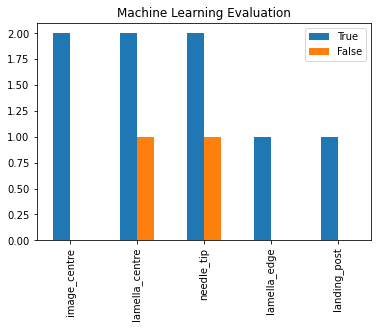

In [139]:
# eval
import pandas as pd

df = pd.DataFrame(score_dict)

# plotting
df.T.plot.bar(title="Machine Learning Evaluation")
#### TODO: change df structure?
# # feature_type #  success ###  ### count
# would make it easier to analyse... 

## Gamma Correction Evaluation
evaluate the average gamma correction


    gamma   diff
0   1.474   46.0
1   1.894  110.0
2   0.218  -34.0
3   0.701   94.0
4   1.203   43.0
5   1.151  103.0
6   1.292  107.0
7   0.402   94.0
8   0.786  -91.0
9   0.997   88.0
10  1.037   79.0
11  0.845   81.0
12  0.072   33.0


<AxesSubplot:title={'center':'Gamma Correction Distribution'}, ylabel='Frequency'>

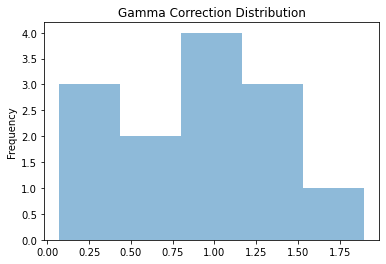

In [140]:

# pprint(gamma_dict)
df_gamma = pd.DataFrame(gamma_dict)
print(df_gamma)

df_gamma["gamma"].plot.hist(bins=5, alpha=0.5, title="Gamma Correction Distribution")